# Diabetes Prediction Model                      
## - Jaynil Patel

<img src='dbts_prediction_2.jpg' style="width:1000px;height:400px"/>

In [150]:
# Importing required libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [151]:
# Loading the data into DataFrame from csv file.

data = pd.read_csv('diabetes.csv')

In [152]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
185,7,194,68,28,0,35.9,0.745,41,1
69,4,146,85,27,100,28.9,0.189,27,0
197,3,107,62,13,48,22.9,0.678,23,1
381,0,105,68,22,0,20.0,0.236,22,0
202,0,108,68,20,0,27.3,0.787,32,0


In [153]:
# Checking the basic information about the dataset, including data types and non-null counts.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [154]:
# Analysing descriptive statistics for each column in the dataset.

data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [155]:
# Checking for the duplicate rows

data.duplicated().sum()

0

<AxesSubplot:>

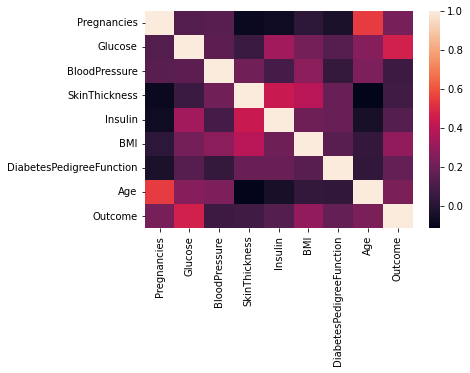

In [156]:
# Checking for the correalation between the columns.

correalation_matrix = data.corr()
sns.heatmap(correalation_matrix)

In [157]:
# Droping the columns that are not required for the analysis.

data = data.drop(['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction'], axis = 1)

In [158]:
data.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,6,148,35,33.6,50,1
1,1,85,29,26.6,31,0
2,8,183,0,23.3,32,1
3,1,89,23,28.1,21,0
4,0,137,35,43.1,33,1


In [159]:
# Checking for the columns with Zero values.

columns_with_zeros = data.columns[(data == 0).sum()>0]
print(list(columns_with_zeros))

['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Outcome']


In [160]:
# Checking for the number of Zero values each column has.

zero_count = (data.drop(columns='Outcome') == 0).sum()
print(zero_count)

Pregnancies      111
Glucose            5
SkinThickness    227
BMI               11
Age                0
dtype: int64


As we can see, 4 out of 5 input columns are having zero values. However, we are not going to fill each zero value as some columns can have genuine zero values. (e.g. Pregnancies and Glucose)

The SkinThickness column is having the maximum and significant number of zero values. Moreover, it is not feasible for a BMI column to have zero values.
Hence, we are going to replace them with mean values of those respective columns.

In [161]:
data['SkinThickness'] = data['SkinThickness'].replace(0, np.nan)
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].mean())

data['BMI'] = data['BMI'].replace(0, np.nan)
data['BMI'] = data['BMI'].fillna(data['BMI'].mean())

In [162]:
zero_count2 = (data.drop(columns='Outcome') == 0).sum()
print(zero_count2)

Pregnancies      111
Glucose            5
SkinThickness      0
BMI                0
Age                0
dtype: int64


### Plotting the distribution of each column

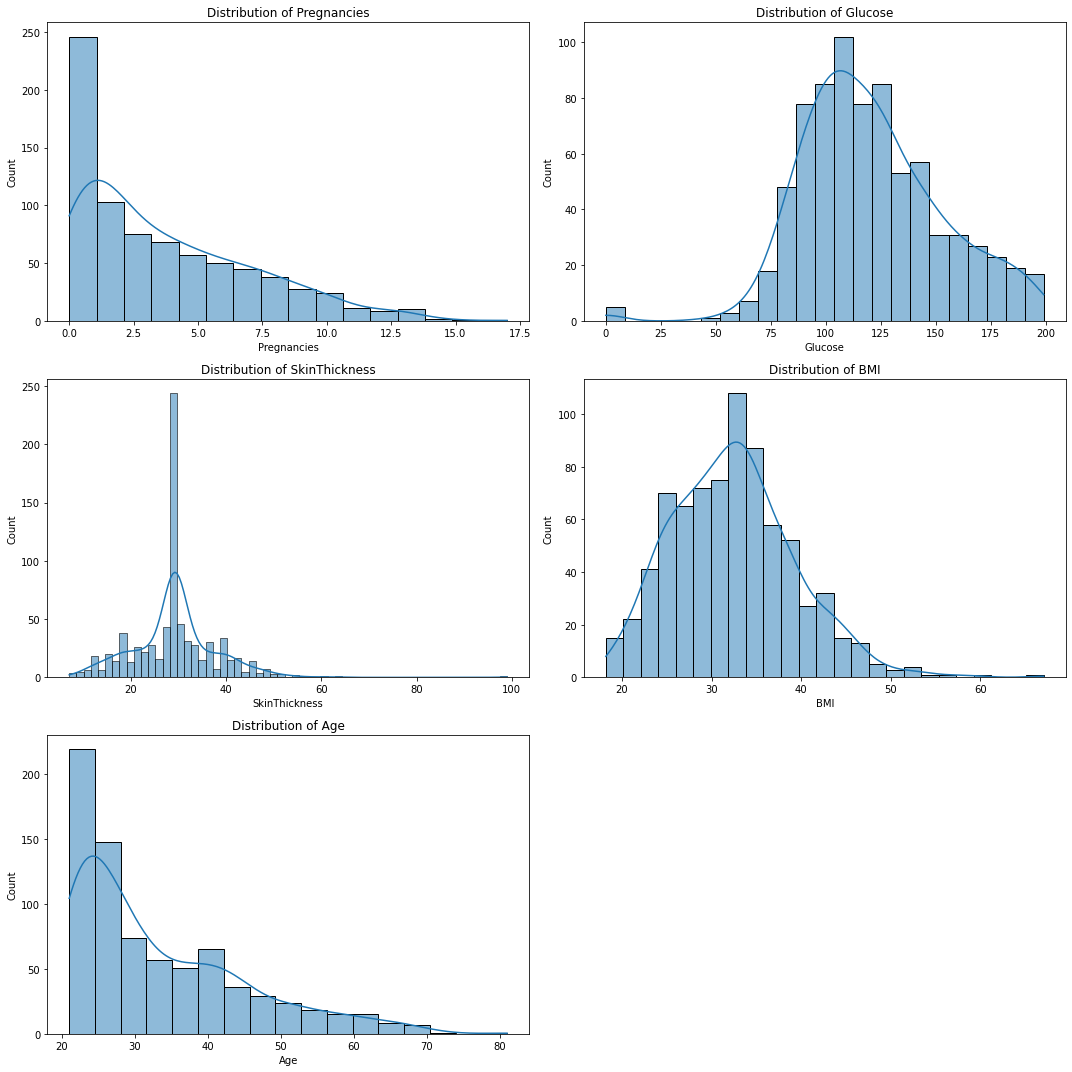

In [163]:
clmns = list(data.columns)[:-1]

plt.figure(figsize=(15,15))
for i , c in enumerate(clmns,1):
    plt.subplot(3,2,i)
    sns.histplot(data[c], kde = True)
    plt.title(f'Distribution of {c}')
    
plt.tight_layout()
plt.show()

### Checking for outliers

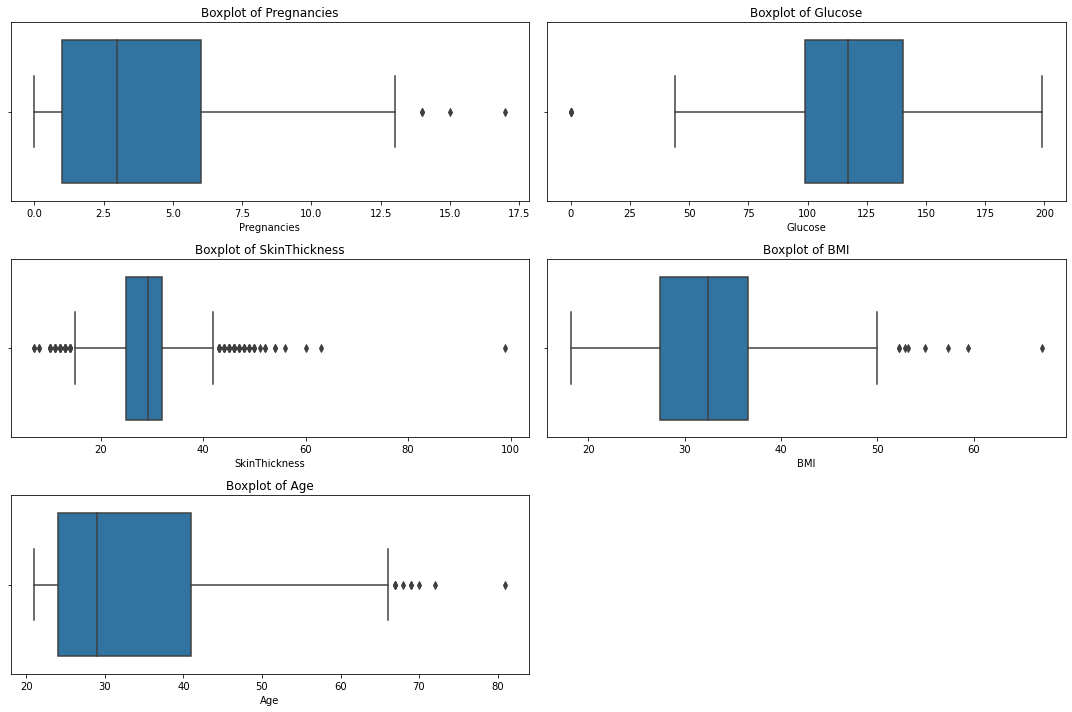

In [164]:
cls = list(data.columns[:-1])
plt.figure(figsize=(15, 10))
for i, c in enumerate(cls, 1):
    plt.subplot(3,2,i)
    sns.boxplot(x=data[c])
    plt.title(f'Boxplot of {c}')
    
plt.tight_layout()
plt.show()

### Preparing data for modeling

In [165]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [166]:
X

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,6,148,35.00000,33.6,50
1,1,85,29.00000,26.6,31
2,8,183,29.15342,23.3,32
3,1,89,23.00000,28.1,21
4,0,137,35.00000,43.1,33
...,...,...,...,...,...
763,10,101,48.00000,32.9,63
764,2,122,27.00000,36.8,27
765,5,121,23.00000,26.2,30
766,1,126,29.15342,30.1,47


In [167]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### Scaling the features using StandardScaler

In [168]:
ss = preprocessing.StandardScaler()
X = ss.fit_transform(X)
X

array([[ 6.39947260e-01,  8.48323795e-01,  6.65502121e-01,
         1.66291742e-01,  1.42599540e+00],
       [-8.44885053e-01, -1.12339636e+00, -1.74633816e-02,
        -8.52531177e-01, -1.90671905e-01],
       [ 1.23388019e+00,  1.94372388e+00,  8.08793628e-16,
        -1.33283341e+00, -1.05584152e-01],
       ...,
       [ 3.42980797e-01,  3.30087080e-03, -7.00428884e-01,
        -9.10749630e-01, -2.75759658e-01],
       [-8.44885053e-01,  1.59786597e-01,  8.08793628e-16,
        -3.43119717e-01,  1.17073215e+00],
       [-8.44885053e-01, -8.73019198e-01,  2.10191786e-01,
        -2.99455878e-01, -8.71373930e-01]])

### Doing Train-Test split of 80-20 %

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [170]:
clf = svm.SVC(kernel='linear', degree=3)
clf.fit(X_train, y_train)


pred = clf.predict(X_test)
a_score = accuracy_score(y_test, pred)
print(a_score*100)

80.51948051948052


### Hyperparameter Tuning with Random State

In [171]:
random_states = range(0, 400)  

best_accuracy = 0
best_random_state = None

for state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=state, test_size=0.2)
    
    clf = svm.SVC(kernel='linear', degree=3) 
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    a_score = accuracy_score(y_test, pred)
    
    if a_score > best_accuracy:
        best_accuracy = a_score
        best_random_state = state

print(f"Best random state: {best_random_state}, Best accuracy: {best_accuracy*100:.1f}%")

Best random state: 395, Best accuracy: 86.4%


The best Random state is 395 with the accuracy of 86.4%. Hence we will train our final model with that.

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=395, test_size=0.2)
    
clf = svm.SVC(kernel='linear', degree=3) 
clf.fit(X_train, y_train)

SVC(kernel='linear')

### A simple program to predict

In [173]:
prgs = eval(input('Enter number of Pregnancies:'))
glu= eval(input('Enter Glucose level:'))
st = eval(input('Enter SkinThickness:'))
b = eval(input('Enter BMI:'))
a = eval(input('Enter Age:'))
input_data = [[prgs, glu, st, b, a]]
df = pd.DataFrame(input_data, columns=['Pregnancies', 'Glucose', 'SkinThickness', 'BMI', 'Age'])
print('*'*50)
print(df)      
t_data = ss.transform(df)
new_pred = clf.predict(t_data)
print('*'*50)
print('\n')
if new_pred == [0]:
    print('Person does not have diabetes')
else:
    print('Person has diabetes')

Enter number of Pregnancies:2
Enter Glucose level:140
Enter SkinThickness:45
Enter BMI:50
Enter Age:40
**************************************************
   Pregnancies  Glucose  SkinThickness  BMI  Age
0            2      140             45   50   40
**************************************************


Person has diabetes


### Generating 'pkl' files for model deployment in production

In [174]:
import joblib

joblib.dump(clf, 'diabetes_prediction_model.pkl')  
joblib.dump(ss, 'scaler.pkl')             

['scaler.pkl']